## Data Exploration and analysis

In [1]:
#importing all necessary libraries for visualization and data processing
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# input variable refers to the directory of the dataset in a local environment
input = "DL Project"

In [11]:
import tensorflow as tf

from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import Dropout, Dense, Flatten, GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import img_to_array,array_to_img, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.optimizers import SGD

In [12]:
print(os.listdir("../"+input))

['.ipynb_checkpoints', 'archive.zip', 'Celeba_Preprocessing.ipynb', 'celeba_visualization.ipynb', 'img_align_celeba', 'list_attr_celeba.csv', 'list_bbox_celeba.csv', 'list_eval_partition.csv', 'list_landmarks_align_celeba.csv']


In [33]:
images_folder="../"+input+"/img_align_celeba/img_align_celeba/"

df_attr = pd.read_csv("../" +input+ "/list_attr_celeba.csv")
df_attr.set_index('image_id', inplace=True)
df_attr.replace(to_replace=-1, value=0, inplace=True)

In [14]:
df_attr.head(5)

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
image_id,,,,,,,,,,,,,,,,,,,,,
000001.jpg,0,1,1,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
000002.jpg,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
000003.jpg,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
000004.jpg,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,1
000005.jpg,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


Using describe() method in Pandas to describe of the dataFrame

In [15]:
df_attr.describe()

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
count,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,...,202599.000000,202599.00000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000
mean,0.111136,0.266981,0.512505,0.204572,0.022443,0.151575,0.240796,0.234532,0.239251,0.147992,...,0.056511,0.48208,0.208402,0.319567,0.188925,0.048460,0.472436,0.122967,0.072715,0.773617
std,0.314301,0.442383,0.499845,0.403389,0.148121,0.358610,0.427568,0.423707,0.426627,0.355093,...,0.230906,0.49968,0.406167,0.466310,0.391450,0.214737,0.499241,0.328400,0.259669,0.418491
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Listing out all columns or features. We will only select important features to limit scope of the problem. 

In [16]:
df_attr.columns

Index(['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes',
       'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair',
       'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin',
       'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones',
       'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard',
       'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline',
       'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair',
       'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick',
       'Wearing_Necklace', 'Wearing_Necktie', 'Young'],
      dtype='object')

In [17]:
df_attr.isnull().sum()

5_o_Clock_Shadow       0
Arched_Eyebrows        0
Attractive             0
Bags_Under_Eyes        0
Bald                   0
Bangs                  0
Big_Lips               0
Big_Nose               0
Black_Hair             0
Blond_Hair             0
Blurry                 0
Brown_Hair             0
Bushy_Eyebrows         0
Chubby                 0
Double_Chin            0
Eyeglasses             0
Goatee                 0
Gray_Hair              0
Heavy_Makeup           0
High_Cheekbones        0
Male                   0
Mouth_Slightly_Open    0
Mustache               0
Narrow_Eyes            0
No_Beard               0
Oval_Face              0
Pale_Skin              0
Pointy_Nose            0
Receding_Hairline      0
Rosy_Cheeks            0
Sideburns              0
Smiling                0
Straight_Hair          0
Wavy_Hair              0
Wearing_Earrings       0
Wearing_Hat            0
Wearing_Lipstick       0
Wearing_Necklace       0
Wearing_Necktie        0
Young                  0


As we can see, all features have non-null entries.

In [18]:
df_attr.shape

(202599, 40)

In [41]:
for i,j in enumerate(df_attr.columns):
    print(i+1, j)

1 5_o_Clock_Shadow
2 Arched_Eyebrows
3 Attractive
4 Bags_Under_Eyes
5 Bald
6 Bangs
7 Big_Lips
8 Big_Nose
9 Black_Hair
10 Blond_Hair
11 Blurry
12 Brown_Hair
13 Bushy_Eyebrows
14 Chubby
15 Double_Chin
16 Eyeglasses
17 Goatee
18 Gray_Hair
19 Heavy_Makeup
20 High_Cheekbones
21 Male
22 Mouth_Slightly_Open
23 Mustache
24 Narrow_Eyes
25 No_Beard
26 Oval_Face
27 Pale_Skin
28 Pointy_Nose
29 Receding_Hairline
30 Rosy_Cheeks
31 Sideburns
32 Smiling
33 Straight_Hair
34 Wavy_Hair
35 Wearing_Earrings
36 Wearing_Hat
37 Wearing_Lipstick
38 Wearing_Necklace
39 Wearing_Necktie
40 Young


As described in the website, the dataset has 202599 data points with 40 features

### Exploring images

Smiling         0
Male            0
Bangs           0
Heavy_Makeup    1
Eyeglasses      0
Young           1
Name: 000609.jpg, dtype: int64

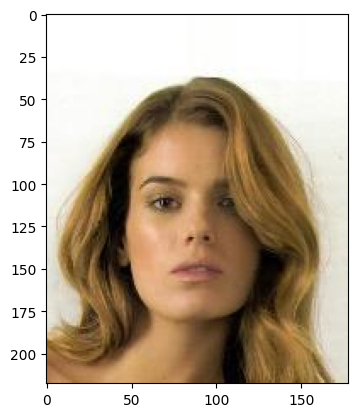

In [47]:
example_pic = images_folder + "000609.jpg"

img = load_img(example_pic)
plt.grid(False)
plt.imshow(img)
df_attr.loc[example_pic.split('/')[-1]][['Smiling','Male',"Bangs","Heavy_Makeup","Eyeglasses" ,"Young"]]

Taking a random sample from the dataset, we can match visible features and feature data from list_attr_celeba and observe the accuracy in features

### Distribution of Data

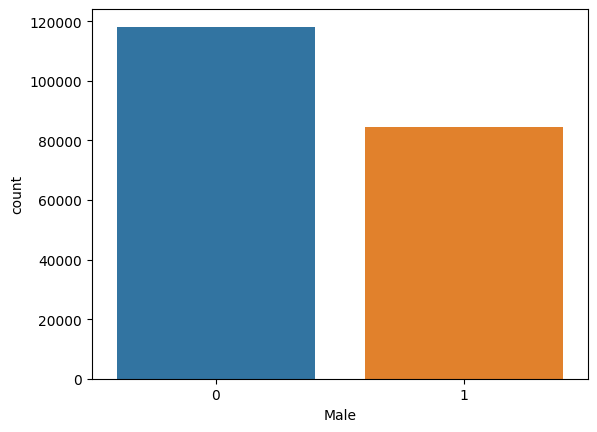

In [45]:
sns.countplot(data = df_attr, x = "Male")
plt.show()

<AxesSubplot: xlabel='Eyeglasses', ylabel='count'>

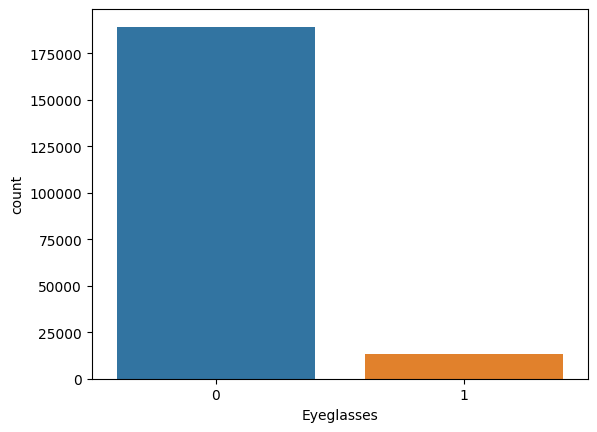

In [48]:
sns.countplot(data = df_attr,x="Eyeglasses")

Attribute distribution - 
The data is imbalanced, data points with people wearing eyeglasses is less than 25000 and the total number of males in the entire dataset is also lesser than the total number of females.

### Data partitioning and pre-processing

In [53]:
df_partition = pd.read_csv("../"+input+"/list_eval_partition.csv")
df_partition.head(5)

,image_id,partition
0,000001.jpg,0
1,000002.jpg,0
2,000003.jpg,0
3,000004.jpg,0
4,000005.jpg,0


In [54]:
df_partition.sample(100)

,image_id,partition
27290,027291.jpg,0
24803,024804.jpg,0
74350,074351.jpg,0
161816,161817.jpg,0
9388,009389.jpg,0
...,...,...
46752,046753.jpg,0
19874,019875.jpg,0
113640,113641.jpg,0
4607,004608.jpg,0


In [55]:
df_partition["partition"].value_counts().sort_index()

0    162770
1     19867
2     19962
Name: partition, dtype: int64

In [62]:

df_par_attr = df_partition.join(df_attr["Male"],how="inner").join(df_attr["Eyeglasses"],how="inner")

df_par_attr.head(5)

,partition,Male,Eyeglasses
image_id,,,
000001.jpg,0,0,0
000002.jpg,0,0,0
000003.jpg,0,1,0
000004.jpg,0,0,0
000005.jpg,0,0,0


We have now selected features: Male and Eyeglasses

### Data pre-processing and splitting

In [63]:
# to load the image data and normalize the color image by dividing pixel values by 255.0
def load_reshape_img(fname):
    img = load_img(fname)
    x = img_to_array(img)/255.0
    x = x.reshape((1,) + x.shape)

    return x

In [64]:
def generate_df(partition, attr, num_samples):
  
    
    df_ = df_par_attr[(df_par_attr['partition'] == partition) 
                           & (df_par_attr[attr] == 0)].sample(int(num_samples/2))
    df_ = pd.concat([df_,
                      df_par_attr[(df_par_attr['partition'] == partition) 
                                  & (df_par_attr[attr] == 1)].sample(int(num_samples/2))])

    # for train and validation data split
    if partition != 2:
        x_ = np.array([load_reshape_img(images_folder + fname) for fname in df_.index])
        x_ = x_.reshape(x_.shape[0], 218, 178, 3)
        y_ = np_utils.to_categorical(df_[attr],2)
    
    # for test data split
    else:
        x_ = []
        y_ = []

        for index, target in df_.iterrows():
            im = cv2.imread(images_folder + index)
            im = cv2.resize(cv2.cvtColor(im, cv2.COLOR_BGR2RGB), (IMG_WIDTH, IMG_HEIGHT)).astype(np.float32) / 255.0
            im = np.expand_dims(im, axis =0)
            x_.append(im)
            y_.append(target[attr])

    return x_, y_

### Data augmentation

To the address the shortage of data for some selected features, we will generate augmented images of the original dataset to increase the amount of data that the model can use. 

In [67]:
# Using ImageDataGenerator as augmentation generator

datagen =  ImageDataGenerator(
  rotation_range=30,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True
)


In [68]:
img = load_img(example_pic)
x = img_to_array(img)/255.
x = x.reshape((1,) + x.shape)


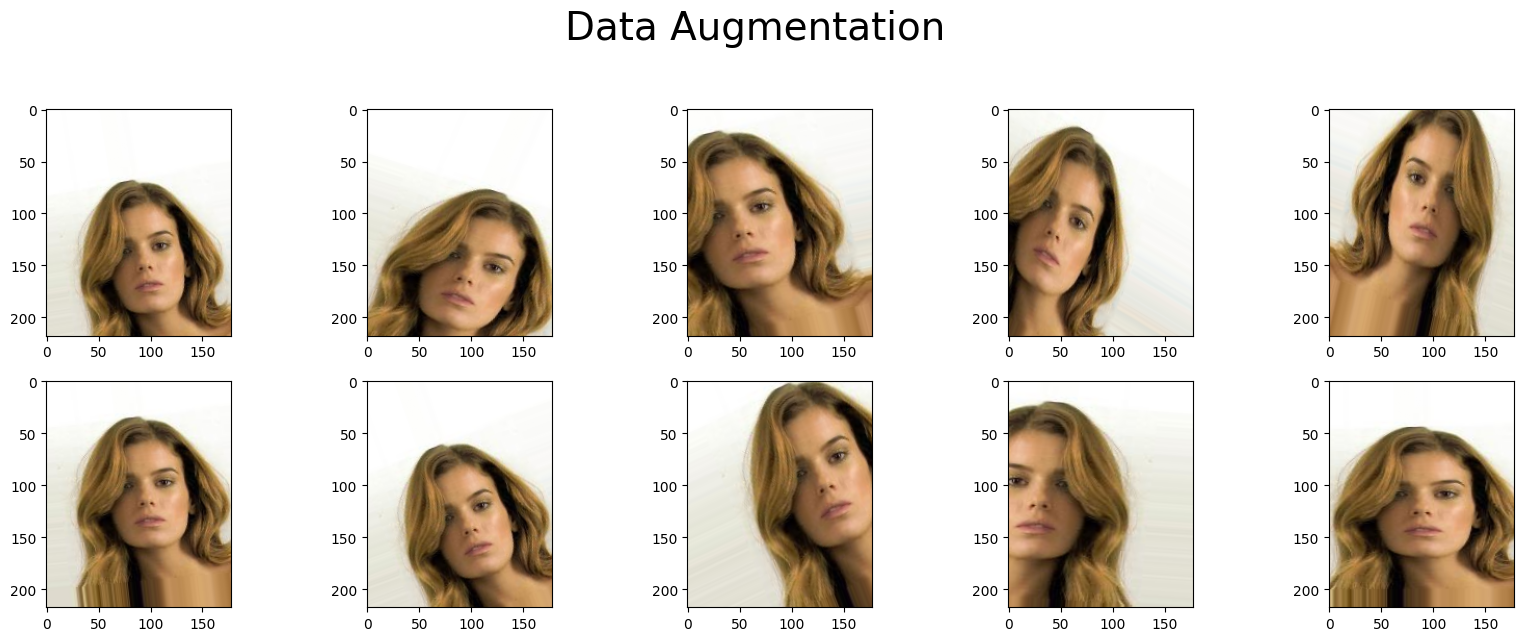

In [70]:
#plotting 10 images of augmentation 
plt.figure(figsize=(20,10))
plt.suptitle('Data Augmentation', fontsize=28)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.subplot(3, 5, i+1)
    plt.grid(False)
    plt.imshow( batch.reshape(218, 178, 3))
    
    if i == 9:
        break
    i += 1
    
plt.show()